In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("houses_to_rent_v2.csv")

In [10]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [12]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [19]:
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

# Estatítica univariada

In [21]:
df.rename(columns = {'rent amount (R$)': 'valor_aluguel'}, inplace=True)

In [23]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

In [25]:
df['valor_aluguel'].median()

2661.0

In [26]:
df['valor_aluguel'].std()

3408.5455176710675

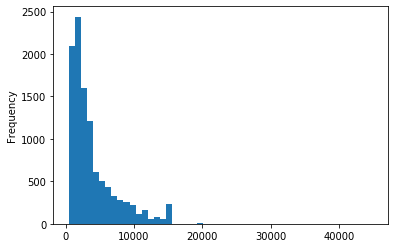

In [27]:
df['valor_aluguel'].plot(kind='hist', bins=50)

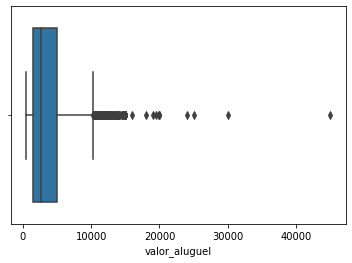

In [29]:
sns.boxplot(df['valor_aluguel'])

In [30]:
# - Skew positivo
df['valor_aluguel'].skew()

1.8388773035440982

In [32]:
# - Leptocurtica
df['valor_aluguel'].kurtosis()

4.624228179818687

# Exploração multi

### Perguntas
- Qual a cidade com alugueis **médios** mais caros?
- Quantos banheiros?
- Animais?
- Os imóveis mais caros são mobiliados?

In [41]:
# Qual cidade mais cara?
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)


,city,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


In [48]:
# Quantos banheiros nas resideências com alugueis mais altos
## Alugueis mais altos, valor > 5000
df['aluguel_alto'] = df['valor_aluguel'].apply(lambda x: "Alto" if x>5000 else "Baixo")
df['aluguel_alto'].value_counts()
#sns.boxplot(x='bathroom', y='valor_aluguel', data=df)

Baixo    8153
Alto     2539
Name: aluguel_alto, dtype: int64

In [49]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [58]:
# Animais
df.groupby('animal')['valor_aluguel'].mean()

animal
acept        4019.685786
not acept    3464.212121
Name: valor_aluguel, dtype: float64

In [61]:
# Mobilia
df.groupby('furniture')['valor_aluguel'].mean()

furniture
furnished        4882.28703
not furnished    3578.46092
Name: valor_aluguel, dtype: float64

### Hipóteses
- SP é a cidade com aluguel mais caro
- Quanto + banheiros + aluguel
- Com mobília é mais caro

In [63]:
df[['valor_aluguel', 'bathroom']].corr(method='spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [65]:
df.corr(method='spearman')

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.848880,0.827743,0.701161,0.225983,0.728095,0.682270,0.745816,0.742642
rooms,0.848880,1.000000,0.769822,0.646679,0.206182,0.600969,0.595516,0.613788,0.621837
bathroom,0.827743,0.769822,1.000000,0.702826,0.293821,0.715890,0.654556,0.721150,0.740281
parking spaces,0.701161,0.646679,0.702826,1.000000,0.229139,0.620175,0.582921,0.625150,0.641078
hoa (R$),0.225983,0.206182,0.293821,0.229139,1.000000,0.355785,0.392537,0.293228,0.519755
valor_aluguel,0.728095,0.600969,0.715890,0.620175,0.355785,1.000000,0.659230,0.988045,0.968176
property tax (R$),0.682270,0.595516,0.654556,0.582921,0.392537,0.659230,1.000000,0.656049,0.731439
fire insurance (R$),0.745816,0.613788,0.721150,0.625150,0.293228,0.988045,0.656049,1.000000,0.945772
total (R$),0.742642,0.621837,0.740281,0.641078,0.519755,0.968176,0.731439,0.945772,1.000000


# Visualização de dados

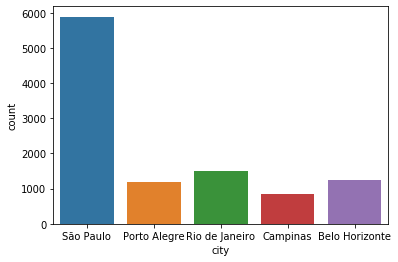

In [67]:
sns.countplot(x='city', data=df)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

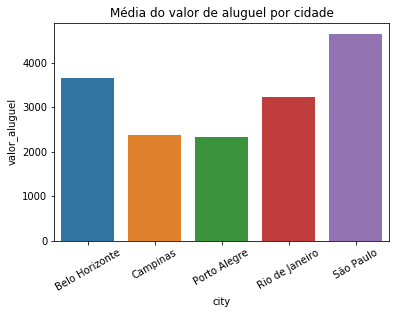

In [79]:
sns.barplot(x='city', y='valor_aluguel', data=df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title("Média do valor de aluguel por cidade")
plt.xticks(rotation=30)

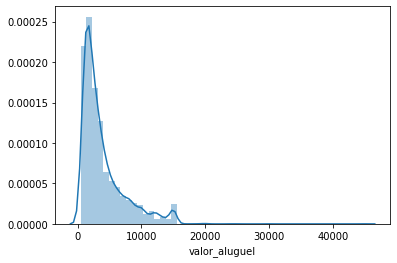

In [81]:
sns.distplot(df['valor_aluguel'])

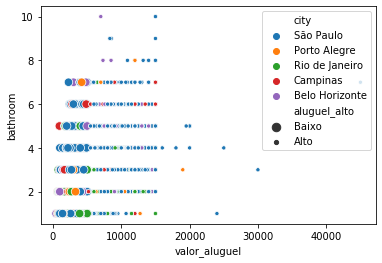

In [85]:
sns.scatterplot(x='valor_aluguel', y='bathroom', hue='city', size='aluguel_alto', data=df)

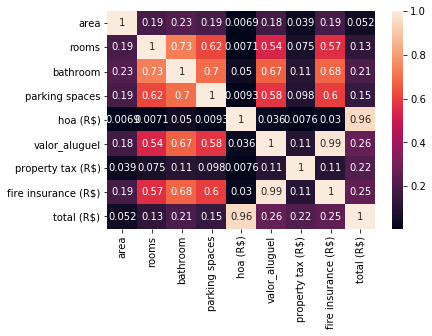

In [88]:
sns.heatmap(df.corr(), annot=True)

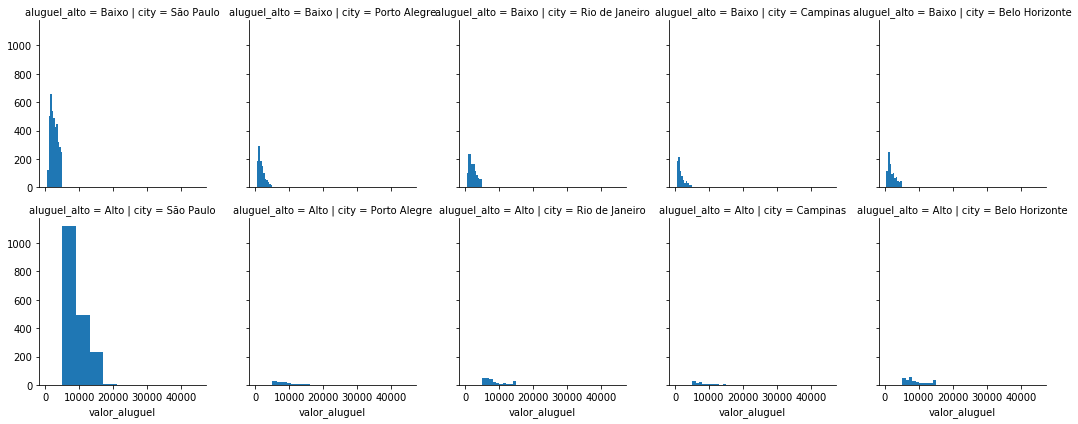

In [92]:
g = sns.FacetGrid(df, col='city', row='aluguel_alto')
g = g.map(plt.hist, 'valor_aluguel')

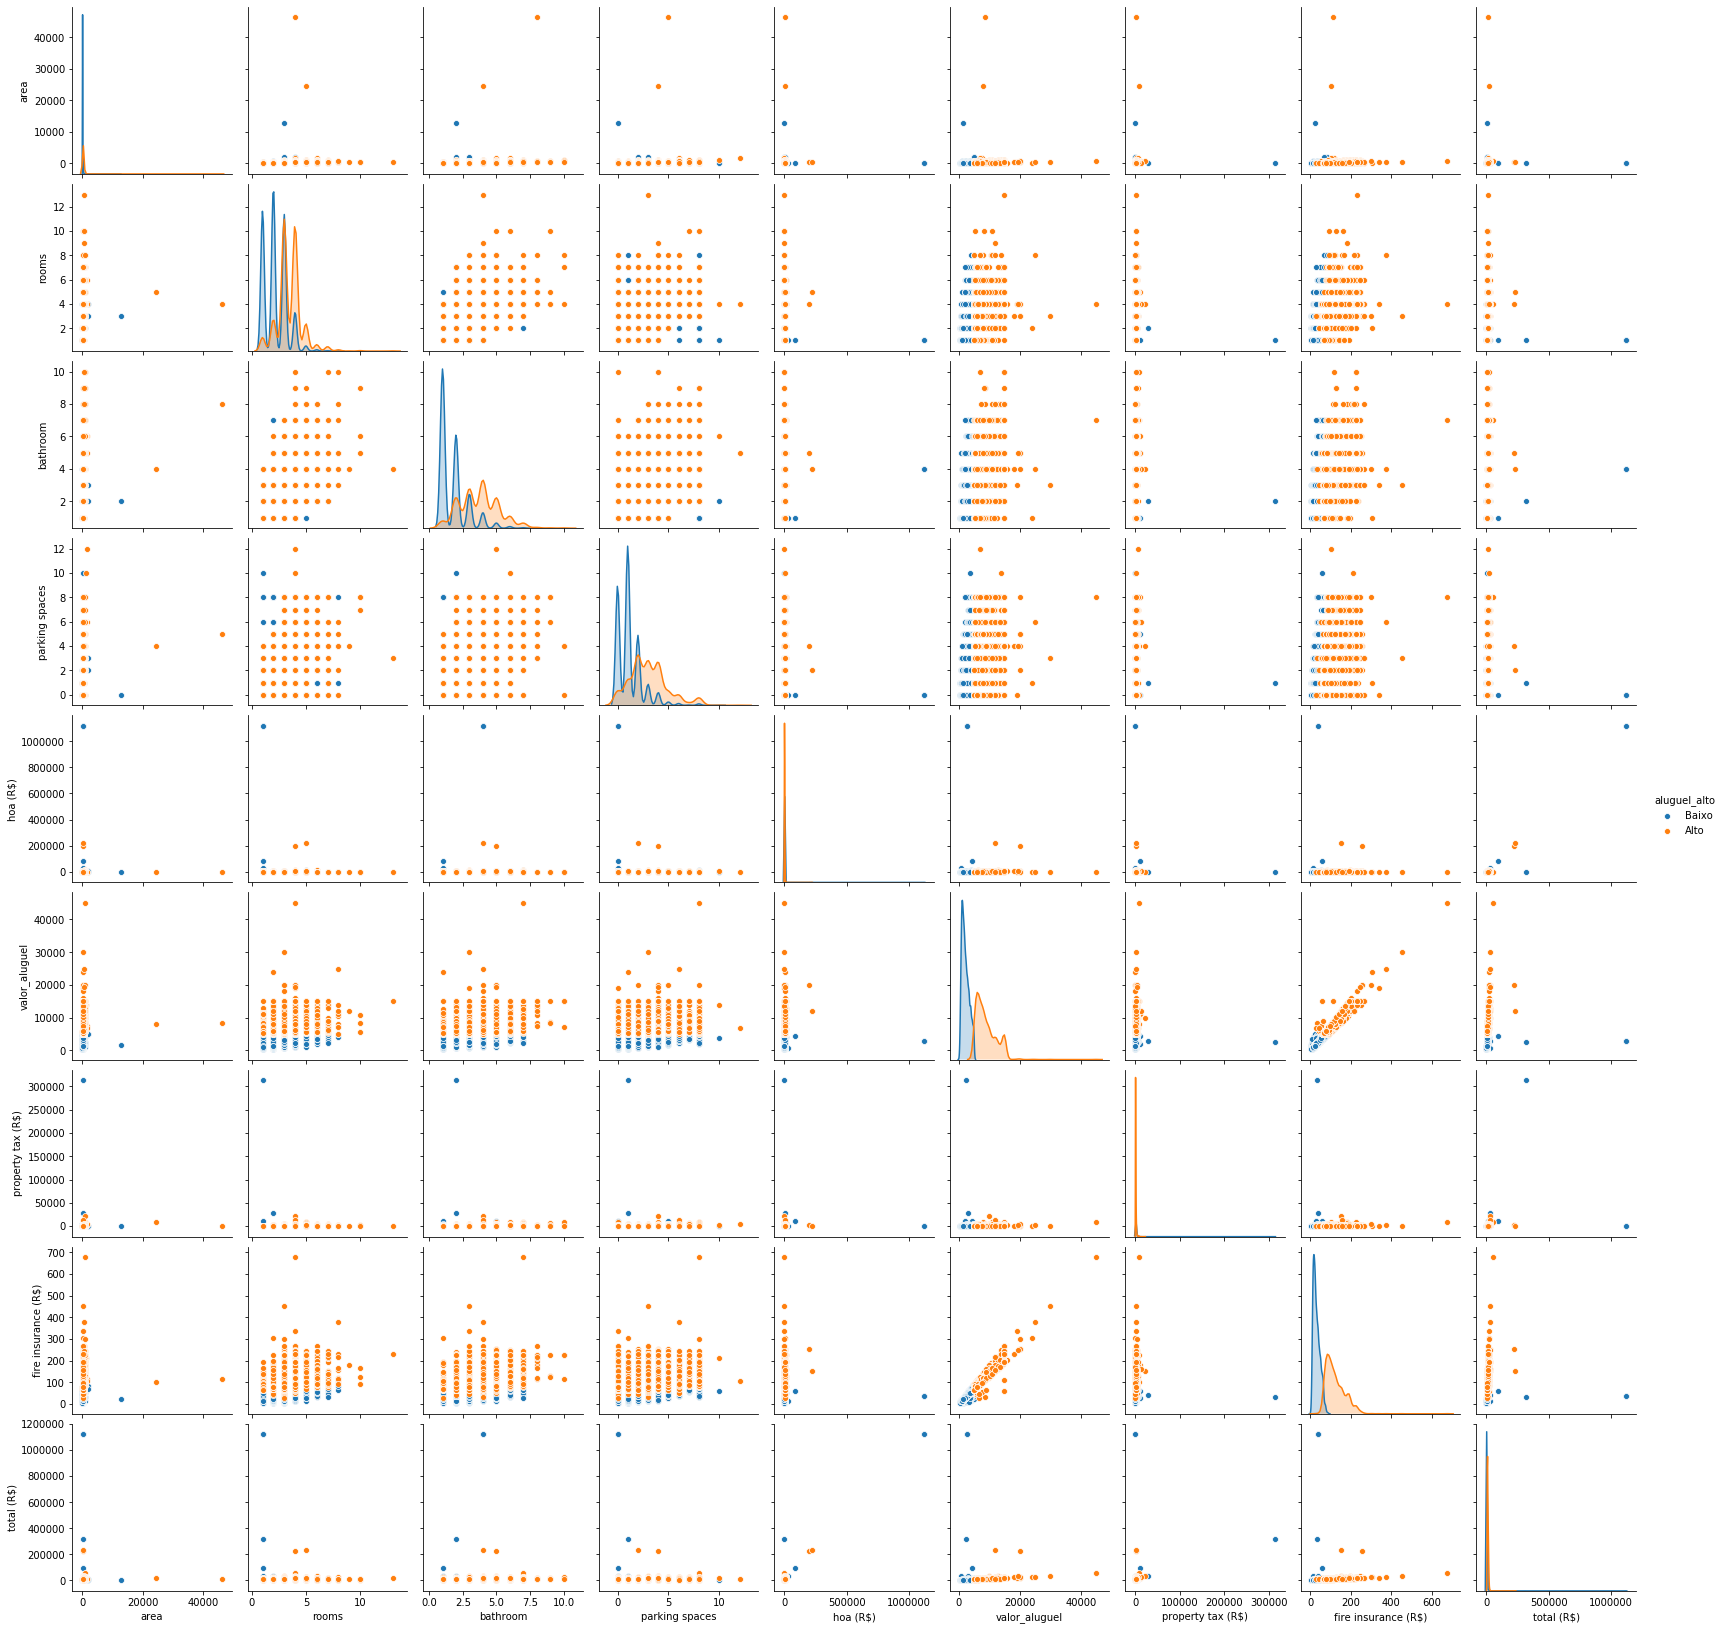

In [93]:
sns.pairplot(df, hue='aluguel_alto')